In [1]:
#*******************************************************************************************
 #
 #  File Name:  mars_weather.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, mars_weather.ipynb, uses the Python modules, 
 #      requests and beautiful soup to scrape information about weather on Mars from 
 #      a website.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  09/13/2023      Initial Development                     Nicholas J. George
 #
 #******************************************************************************************/

import logx
import matplotlibx
import pandasx

import mars_news_constants

import requests

import datetime as dt
import pandas as pd

from bs4 import BeautifulSoup as soup
from scipy.signal import find_peaks

pd.options.mode.chained_assignment = None

In [2]:
CONSTANT_LOCAL_FILE_NAME = 'mars_weather.ipynb'


logx.set_log_mode(False)

logx.set_image_mode(False)


logx.begin_program('mars_weather')

Program execution begins...



# **Section 1: Visit the [Mars Temperature Data Website](https://static.bc-edx.com/data/web/mars_facts/temperature.html)**

## **1.1: Request the Webpage**

In [3]:
requests_response = requests.get(mars_news_constants.CONSTANT_MARS_WEATHER_URL)

logx.log_write_object(requests_response.text)

## **1.2: Parse Text with Beautiful Soup**

In [4]:
requests_response_bs4 = soup(requests_response.text, 'html.parser')

logx.log_write_object(requests_response_bs4)

## **1.3: Scrape the Table of Temperatures**

In [5]:
response_results_bs4 = requests_response_bs4.find('table', class_ = 'table')

logx.log_write_object(response_results_bs4)

# **Section 2: Store the Table Information**

## **2.1: Header Text Extraction**

In [6]:
# This line of code creates an empty list for the table column headers.
headers_string_list = []

# This line of code extracts all the table column headers and stores them in a 
# Beautiful Soup Result Set Object.
headers_results_bs4 = response_results_bs4.find_all('th')

# This repetition loop extracts each header's text and stores them 
# in a list.
for header in headers_results_bs4:
    
    headers_string_list.append(header.text)


logx.log_write_object(headers_string_list)

## **2.2: Weather Informaton Text Extraction**

In [7]:
# This line of code creates an empty list for the weather information.
weather_table_dictionary_list = []

# This line of code extracts all the rows of weather information 
# from the Beautiful Soup Elements Object.
weather_table_results_bs4 = response_results_bs4.find_all('tr', class_ = 'data-row')

# This repetition loop extracts the weather table information and stores it in a list. 
for row in weather_table_results_bs4:

    row_results_bs4 = row.find_all('td')

    
    element_string_list = []
    
    for element in row_results_bs4:
        
        element_string_list.append(element.text)

    
    weather_table_dictionary_list.append(element_string_list)
    
    
logx.log_write_object(headers_string_list)

## **2.3: Mars Weather DataFrame**

In [8]:
mars_weather_dataframe \
    = pd.DataFrame(weather_table_dictionary_list, columns = headers_string_list)

logx.log_write_object(mars_weather_dataframe)

## **2.4: Display Mars Weather DataFrame**

In [9]:
pandasx.return_formatted_table(mars_weather_dataframe, 'Table 2.4: Mars Weather Data')

id,terrestrial_date,sol,ls,month,min_temp,pressure
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
57,2012-08-21,15,158,6,-78.0,740.0
68,2012-08-22,16,158,6,-77.0,740.0
79,2012-08-23,17,159,6,-76.0,742.0
112,2012-08-27,21,161,6,-74.0,741.0
114,2012-08-28,22,162,6,-74.0,742.0


# **Section 3: Preprocessing**

## **3.1: Current Mars Weather Data Type Examination**

In [10]:
dtypes_dataframe = mars_weather_dataframe.dtypes.to_frame()

dtypes_dataframe.index.name = 'column'

dtypes_dataframe.rename(columns = {dtypes_dataframe.columns[0]: 'dtype'}, inplace = True)


pandasx.return_formatted_table \
    (dtypes_dataframe, 'Table 3.1: Mars Weather Data Types', hide_index_boolean = False)

,dtype
column,
id,object
terrestrial_date,object
sol,object
ls,object
month,object
min_temp,object
pressure,object


## **3.2: Data Type Conversion**

In [11]:
mars_weather_dataframe[['id']] = mars_weather_dataframe[['id']].astype(str)

mars_weather_dataframe['terrestrial_date'] \
    = pd.to_datetime(mars_weather_dataframe['terrestrial_date']).dt.date

mars_weather_dataframe[['sol', 'ls', 'month']] \
    = mars_weather_dataframe[['sol', 'ls', 'month']].astype(int)

mars_weather_dataframe[['min_temp', 'pressure']] \
    = mars_weather_dataframe[['min_temp', 'pressure']].astype(float)

## **3.3: Data Type Change Confirmation**

In [12]:
dtypes_dataframe = mars_weather_dataframe.dtypes.to_frame()

dtypes_dataframe.index.name = 'column'

dtypes_dataframe.rename(columns = {dtypes_dataframe.columns[0]: 'dtype'}, inplace = True)


pandasx.return_formatted_table \
    (dtypes_dataframe, 'Table 3.3: Updated Mars Weather Data Types', hide_index_boolean = False)

,dtype
column,
id,object
terrestrial_date,object
sol,int64
ls,int64
month,int64
min_temp,float64
pressure,float64


# **Section 4: Data Analysis**

## **4.1 -- How many months exist on Mars?**

In [13]:
mars_month_count_integer = mars_weather_dataframe['month'].nunique()

logx.print_and_log_text \
    ('\033[1m' + 'There are {:,} months on Mars.'.format(mars_month_count_integer) + '\033[0m')

There are 12 months on Mars.


## **4.2 -- How many Martian days' worth of data exist in the scraped data set?**

In [14]:
martian_data_days_count_integer = mars_weather_dataframe['sol'].count()

logx.print_and_log_text \
    ('\033[1m' \
     + 'There are {:,} Martian days worth of data on this webpage.' \
         .format(martian_data_days_count_integer) \
     + '\033[0m')

There are 1,867 Martian days worth of data on this webpage.


## **4.3 -- What is the average minimum daily temperature by month?**

### **Average Minimum Daily Temperature By Month**

In [15]:
average_minimum_temperature_by_month_series \
    = mars_weather_dataframe.groupby('month')['min_temp'].mean()

average_minimum_temperature_by_month_series.name = 'temperature'

In [16]:
pandasx.return_formatted_table \
    (average_minimum_temperature_by_month_series.to_frame(), 
     'Table 4.3: Average Low Temperature by Month',
     line_count_integer = 12, hide_index_boolean = False)

,temperature
month,
1,-77.16
2,-79.93
3,-83.31
4,-82.75
5,-79.31
6,-75.30
7,-72.28
8,-68.38
9,-69.17


### **Display Average Minimum Daily Temperature By Month**

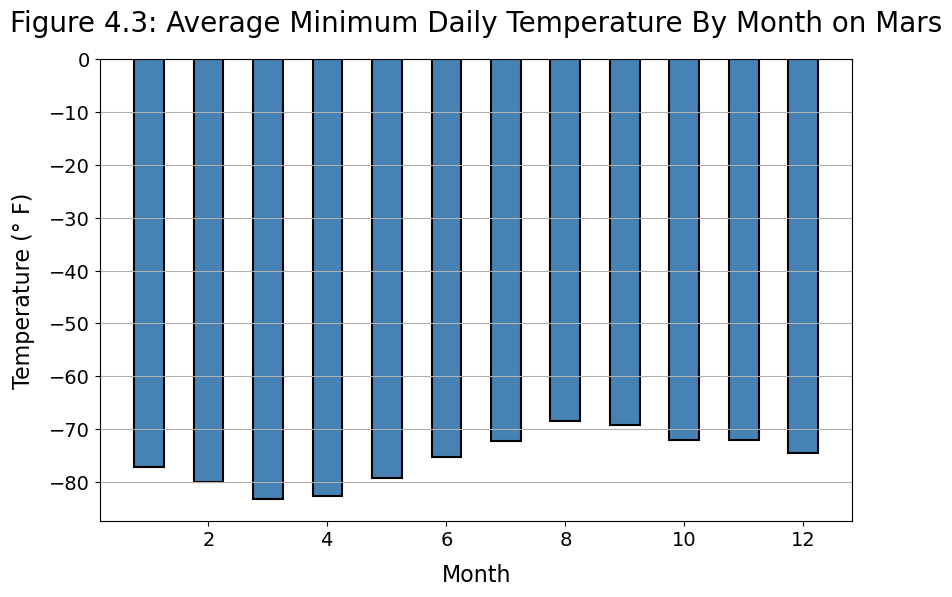

In [17]:
matplotlibx.display_bar_chart_from_series \
    (average_minimum_temperature_by_month_series, 
     'Figure 4.3: Average Minimum Daily Temperature By Month on Mars', 
     'Month', 'Temperature (° F)',
     'steelblue', xtick_label_rotation_float = 0.0)

### **Coldest Month in Curiosity's Location**

In [18]:
coldest_temperature_integer = average_minimum_temperature_by_month_series.min()

coldest_month_integer \
    = average_minimum_temperature_by_month_series \
        [average_minimum_temperature_by_month_series == coldest_temperature_integer] \
            .index[0]

logx.print_and_log_text \
    ('\033[1m' \
     + "On average, the month with the coldest minimum daily temperature on Mars in Curiosity's location" \
     + ' is number {:,}.' .format(coldest_month_integer) \
     + '\033[0m')

On average, the month with the coldest minimum daily temperature on Mars in Curiosity's location is number 3.


### **Warmest Month in Curiosity's Location**

In [19]:
warmest_temperature_integer = average_minimum_temperature_by_month_series.max()

warmest_month_integer \
    = average_minimum_temperature_by_month_series \
        [average_minimum_temperature_by_month_series == warmest_temperature_integer] \
            .index[0]

logx.print_and_log_text \
    ('\033[1m' \
     + "On average, the month with the warmest minimum daily temperature on Mars in Curiosity's location is number" \
     + ' {:,}.'.format(warmest_month_integer) \
     + '\033[0m')

On average, the month with the warmest minimum daily temperature on Mars in Curiosity's location is number 8.


## **4.4 -- What is the average daily atmospheric pressure by month?**

In [20]:
average_pressure_by_month_series = mars_weather_dataframe.groupby('month')['pressure'].mean()

average_pressure_by_month_series.name = 'month'

In [21]:
pandasx.return_formatted_table \
    (average_pressure_by_month_series.to_frame(), 
     'Table 4.4: Average Daily Atmospheric Pressure by Month',
     line_count_integer = 12, hide_index_boolean = False)

,month
month,
1,862.49
2,889.46
3,877.32
4,806.33
5,748.56
6,745.05
7,795.11
8,873.83
9,913.31


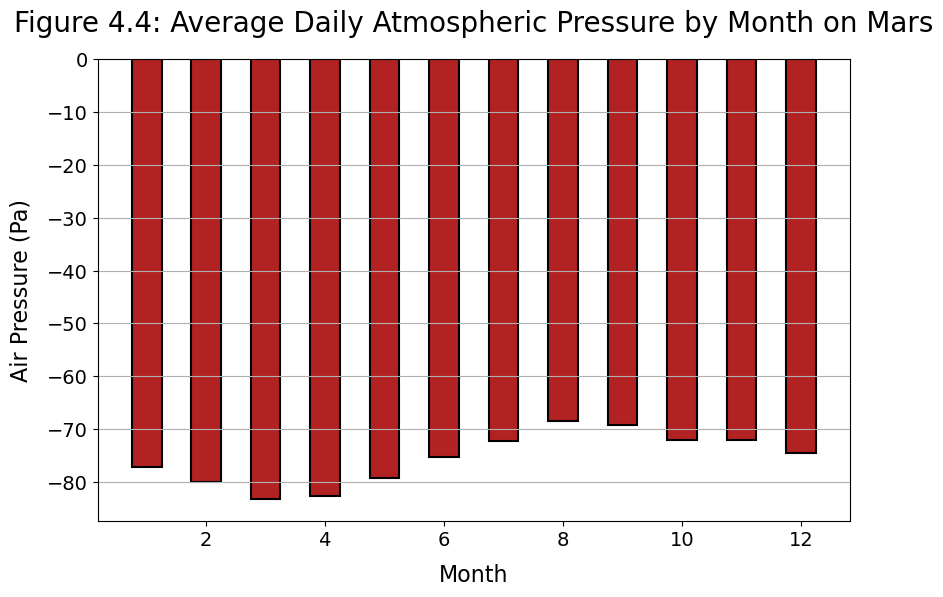

In [22]:
matplotlibx.display_bar_chart_from_series \
    (average_minimum_temperature_by_month_series, 
     'Figure 4.4: Average Daily Atmospheric Pressure by Month on Mars', 
     'Month', 'Air Pressure (Pa)',
     'firebrick', xtick_label_rotation_float = 0.0)

### **Month with the Lowest Average Daily Atmospheric Pressure in Curiosity's Location**

In [23]:
lowest_pressure_integer = average_pressure_by_month_series.min()

lowest_pressure_month_integer \
    = average_pressure_by_month_series \
        [average_pressure_by_month_series == lowest_pressure_integer] \
            .index[0]

logx.print_and_log_text \
    ('\033[1m' \
     + "On average, the month with the lowest daily atmospheric pressure on Mars in Curiosity's location is number {:,}." \
            .format(lowest_pressure_month_integer) \
     + '\033[0m')

On average, the month with the lowest daily atmospheric pressure on Mars in Curiosity's location is number 6.


### **Month with the Highest Average Daily Atmospheric Pressure in Curiosity's Location**

In [24]:
highest_pressure_integer = average_pressure_by_month_series.max()

highest_pressure_month_integer \
    = average_pressure_by_month_series \
        [average_pressure_by_month_series == highest_pressure_integer] \
            .index[0]

logx.print_and_log_text \
    ('\033[1m' \
     + "On average, the month with the highest daily atmospheric pressure on Mars in Curiosity's " \
     + 'location is number {:,}.'.format(highest_pressure_month_integer) \
     + '\033[0m')

On average, the month with the highest daily atmospheric pressure on Mars in Curiosity's location is number 9.


## **4.5 -- How many terrestrial (Earth) days are there in a Martian year?**

### **Solar Longitude**

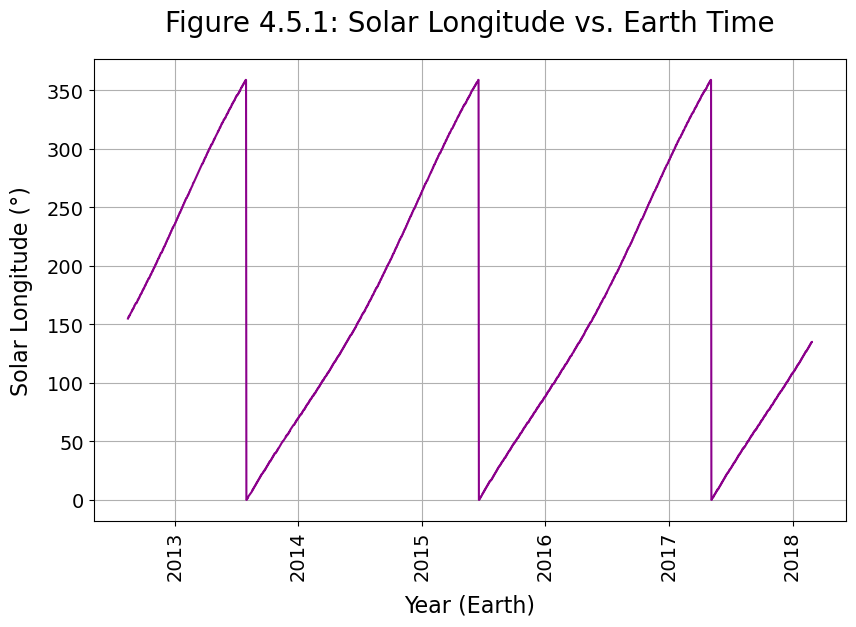

In [25]:
# Ls, solar longitude, is a measure of the time of year on Mars. Mars travels 360° around the Sun 
# in 1 Mars year, and the year begins at Ls 0° and ends at Ls 359°.
solar_longitude_dataframe = mars_weather_dataframe[['terrestrial_date', 'ls']]

solar_longitude_dataframe.set_index('terrestrial_date', drop = True, inplace = True)

solar_longitude_series = solar_longitude_dataframe.squeeze()


matplotlibx.display_plot_from_series \
    (solar_longitude_series, 'Figure 4.5.1: Solar Longitude vs. Earth Time', 
     'darkmagenta', 'Year (Earth)', 'Solar Longitude (°)')

### **Solar Longitude Peaks**

In [26]:
solar_longitude_peaks_nparray, _ = find_peaks(mars_weather_dataframe['ls'], height = 359)

logx.log_write_object(solar_longitude_peaks_nparray)

### **Display Solar Longitude Peaks**

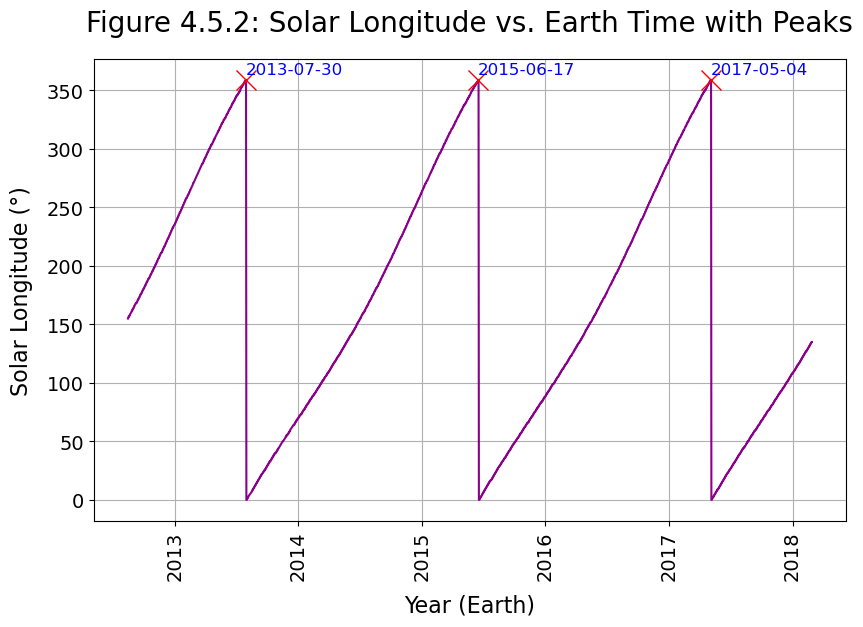

In [27]:
matplotlibx.display_plot_from_series \
    (solar_longitude_series,
     'Figure 4.5.2: Solar Longitude vs. Earth Time with Peaks',
     'darkmagenta', 'Year (Earth)', 'Solar Longitude (°)',
     peaks_nparray = solar_longitude_peaks_nparray)

### **Earth Days in a Martian Year from Solar Longitude**

In [28]:
earth_days_in_martian_year_integer \
    = (mars_weather_dataframe['terrestrial_date'] \
           [solar_longitude_peaks_nparray[len(solar_longitude_peaks_nparray) - 1]] \
       - mars_weather_dataframe['terrestrial_date'] \
           [solar_longitude_peaks_nparray[len(solar_longitude_peaks_nparray) - 2]]) \
          .days

In [29]:
logx.print_and_log_text \
    ('\033[1m' \
     + 'According to peaks in solar longitude from the data set, ' \
     + 'there are {:,} Earth days in a Martian year,\nwhich is the ' \
         .format(earth_days_in_martian_year_integer)
     + 'same as the 687 Earth days found through an Internet search.' \
     + '\033[0m')

According to peaks in solar longitude from the data set, there are 687 Earth days in a Martian year,
which is the same as the 687 Earth days found through an Internet search.


### **Display Minimum Daily Temperature vs. Earth Time**

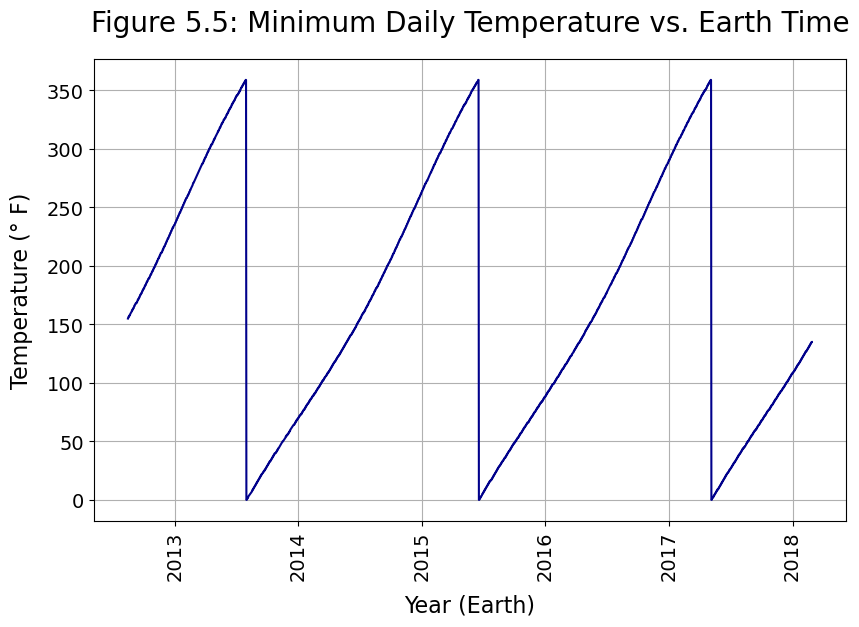

In [30]:
minimum_temperature_dataframe = mars_weather_dataframe[['terrestrial_date', 'min_temp']]

minimum_temperature_dataframe.set_index('terrestrial_date', drop = True, inplace = True)

minimum_temperature_series = solar_longitude_dataframe.squeeze()


matplotlibx.display_plot_from_series \
    (minimum_temperature_series, 'Figure 5.5: Minimum Daily Temperature vs. Earth Time',
     'darkblue', 'Year (Earth)', 'Temperature (° F)')

### **Calculation of Minimum Daily Temperature Peaks**

In [31]:
temperature_peaks_nparray, _ \
    = find_peaks \
        (mars_weather_dataframe['min_temp'], 
         height = -67, threshold = 2, 
         distance = 150, width = 1, 
         prominence = [0, 15])

logx.log_write_object(temperature_peaks_nparray)

### **Display Minimum Daily Temperature vs. Earth Time with Labeled Peaks**

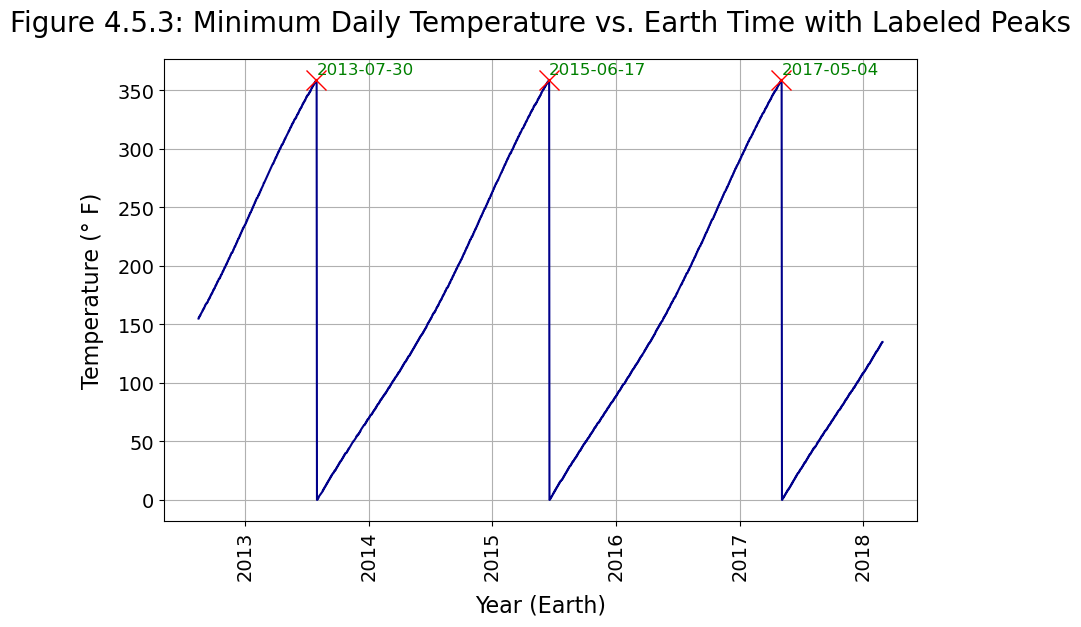

In [32]:
matplotlibx.display_plot_from_series \
    (minimum_temperature_series,
     'Figure 4.5.3: Minimum Daily Temperature vs. Earth Time with Labeled Peaks',
     'darkblue', 'Year (Earth)', 'Temperature (° F)',
     peaks_color_string_list = ['red', 'green'],
     peaks_nparray = solar_longitude_peaks_nparray)

### **Earth Days in a Martian Year from Minimum Daily Temperature Peaks**

In [33]:
first_earth_days_martian_year_integer \
    = (mars_weather_dataframe['terrestrial_date'] \
        [temperature_peaks_nparray[len(temperature_peaks_nparray) - 2]] \
       - mars_weather_dataframe['terrestrial_date'] \
            [temperature_peaks_nparray[len(temperature_peaks_nparray) - 3]]) \
           .days

In [34]:
second_earth_days_martian_year_integer \
    = (mars_weather_dataframe['terrestrial_date'] \
        [temperature_peaks_nparray[len(temperature_peaks_nparray) - 1]] \
       - mars_weather_dataframe['terrestrial_date'] \
            [temperature_peaks_nparray[len(temperature_peaks_nparray) - 2]]) \
           .days

In [35]:
days_integer_list = [first_earth_days_martian_year_integer, second_earth_days_martian_year_integer]

average_earth_days_martian_year_integer = sum(days_integer_list) / len(days_integer_list)


logx.print_and_log_text \
    ('\033[1m' \
     + 'According to peaks in minimum daily temperatures, the number of Earth days in a Martian year range from ' \
     + '{:,} to '.format(first_earth_days_martian_year_integer)
     + '{:,}\n'.format(second_earth_days_martian_year_integer)
     + 'with an average of {:,.1f}, '.format(average_earth_days_martian_year_integer) \
     + 'which is about the same as the 687 Earth days found through an Internet search.' 
     + '\033[0m')

According to peaks in minimum daily temperatures, the number of Earth days in a Martian year range from 674 to 701
with an average of 687.5, which is about the same as the 687 Earth days found through an Internet search.


## **4.6: Export DataFrame to CSV file**

In [36]:
mars_weather_dataframe.to_csv(mars_news_constants.CONSTANT_MARS_WEATHER_DATA_FILE)

In [37]:
#log_subroutine.end_program()